# Local Outlier Factor


        What is the motivation for the Local Outlier Factor (LOF) algorithm?
        
Most of the anomaly detection techniques consider being an outlier or anomaly as a **binary property**. That is, either an object in the dataset is an outlier or not. For many applications, the situation is more complex. It is more meaningful to assign to each object **a degree of being an outlier**.

This is the idea behind the Local Outlier Factor (LOF) anomaly detection technique. 

It was proposed by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng and Jörg Sander in 2000 for finding anomalous data points by measuring the local deviation of a given data point with respect to its neighbors.

https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf


## Local vs Global Outliers

The LOF algorithm is designed to detect local outliers. Let’s try to understand the concept of local outliers by comparing it with global outliers.

Following example shows a simple 2D dataset containing 502 objects. There are 400 objects in the first cluster $C_1$, 100 objects in the cluster $C_2$, and two additional objects $o_1$ and $o_2$. 

- In this example, $C_2$ forms a denser cluster than $C_1$. 

Thus, $o_1$ can be called a global outlier. But $o_2$ is **not a global outlier**.

The density of $o_2$ to its nearest neighbors is not different from the density $C_1$.

However, $o_2$ is probably an outlier compared to the nearest neighbors’ density.

The goal of LOF is to identify both $o_1$ and $o_2$ as outliers. 


<img src="https://cse.unl.edu/~hasan/Pics/LocalVsGlobalOutliers.png" width=300, height=150>


## LOF: Insight of the Algorithm


Local Outlier Factor (LOF) algorithm compares the density of instances around a given instance to the density around its neighbors. 

In the figure below, the instance A has a much lower density than its neighbors, hence could be an anomaly or outlier. An outlier is often more isolated than its $k$ nearest neighbors.

LOF score of a data point reflects its degree of abnormality. In LOF, the outlier rank of a data object is determined by taking into account the clustering structure in a bounded neighborhood of the object. This is formally defined as **local outlier factor** (LOF) score. 

The LOF score measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.

In practice the local density is obtained from the $k$ nearest neighbors. 

The LOF score of an observation is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density: 

- A normal instance is expected to have a local density similar to that of its neighbors.
- An abnormal data or outlier is expected to have much smaller local density. I.e. an outlier should have large LOF value.


<img src="https://cse.unl.edu/~hasan/Pics/LocalOutlierFactor.png" width=300, height=150>




## LOF Values for Inliers and Outliers

Following range of the LOF is used to determine an inlier/outlier.

- $LOF(k) \sim 1$ means Similar density as neighbors (thus not an outlier).
- $LOF(k) < 1$ means Higher density than neighbors (Inlier).
- $LOF(k) > 1$ means Lower density than neighbors (Outlier).

In general, $LOF(k) > 1$ is used to identify an outlier.

However, it depends on the dataset.


## LOF: Main Advantage


The strength of the LOF algorithm is that it takes both local and global properties of datasets into consideration.

Thus, it can perform well even in datasets where abnormal samples have different underlying densities. 

The question is not, how isolated the sample is, but how isolated it is with respect to the surrounding neighborhood.


## LOF: Main Disadvantage

LOF suffers from the "curse of dimensionlity".

It is a distance-based method. Thus, the problems found in distance-based methods will be encountered in LOF (i.e., “curse of dimensionality”).

The direct application of distance-based methods to high dimensional problems often results in unexpected performance and qualitative costs due to the "curse of dimensionality".



## Time-Complexity

The main contribution to the time-complexity of LOF comes from finding the $k$ nearest neighbors.

For each point it scans all points in the dataset, computes distance.

- Thus, the worst-case run-time complexity is $O(n^2)$. 

If an **indexing structure** is used that executes a neighborhood query in $O(log n)$. 

- Thus, an overall average run-time complexity is: $O(n log n)$.


## Local Outlier Factor Algorithm: Scikit-Learn

In this notebook we use Scikit-Learn's **LocalOutlierFactor** class to demonstrate anomaly detection on a synthetic dataset. 

The **key hyperparameter** of this class is the number of nearest neighbors (usually denoted by $k$):

- n_neighbors int, optional (default=20)


Other relevant hyperparameters are:

- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

Algorithm used to compute the nearest neighbors:

        ‘ball_tree’ will use BallTree

        ‘kd_tree’ will use KDTree

        ‘brute’ will use a brute-force search.

        ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


- leaf_size int, optional (default=30)

        Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


- metric string or callable, default ‘minkowski’

        metric used for the distance computation. Any metric from scikit-learn or scipy.spatial.distance can be used.


- p integer, optional (default=2)

        Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. 
        
            p = 1: is equivalent to using manhattan_distance (l1), and euclidean_distance (l2)
            
            p = 2: is equivalent to using euclidean_distance (l2)
            
            For arbitrary p: minkowski_distance (l_p) is used.


- contamination ‘auto’ or float, optional (default=’auto’)

        The amount of contamination of the data set, i.e. the proportion of outliers in the data set. When fitting this is used to define the threshold on the scores of the samples.

            if ‘auto’, the threshold is determined as in the original paper,

            if a float, the contamination should be in the range [0, 0.5].



Unfortunately, the sklearn LocalOutlierFactor object does not return the LOF values. Instead it returns the negative of the LOF values.

        Thus, smaller negative LOF, more likely that the data point is an outlier. 

- negative_outlier_factor_numpy array, shape (n_samples,)

        The opposite LOF of the training samples. The higher, the more normal. 


## Goal

The goal of this notebook is to understand **how to select an optimal value for $k$ (number of nearest neighbors)**.

Selecting a suitable value for $k$ is tricky and depends on the dataset. We need to have an understanding of the structure of the clusters of the dataset.

Breunig et al. (inventor of LOF) provides a heuristic for the selection of optimal $k$. For computing the LOF values for the data points, they suggest to use a range of $k$s.

More specifically, for each data point
- Choose a minimum $k$ and a maximum $k$.
- Compute LOF for each $k$ in that range. 
- Take maximum LOF value.


## A Guideline for Choosing a Minimum $k$ and a Maximum $k$.



- Minimum $k$: should be greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster.

        This lower bound refers to the minimal cluster size which consists of similar behaving points. This means that we consider a cluster of points with a size lower than minimum k value to be represented as outliers. 

- Maximum $k$: should be smaller than the maximum number of nearby samples that can potentially be local outliers. 

        Thus, if we decide that maximum m points can stay in close proximity as outliers without being considered as a cluster of normal points, then, m should be the upper bound for k.




## Tasks

To better understand the optimal setting of the range of $k$, we perform following five tasks. For these tasks we create two types of data distribution (no outlier and some outliers).

1. Two clusters of similar density

        There are no outliers. Thus, all points will have similar LOF. Varying k won't make any difference.
        
2. A single cluster and few distant data points

        The distant points can be considered as outliers. Thus, for a suitable range of values of k, these distant points should have large LOF (i.e., they are outliers).


- Task 1: Analyze the effect of various $k$ on two clusters of similar density
- Task 2: Analyze the effect of various $k$ on a single cluster and few distant points
- Task 3: Effect of small $k$ on a single cluster and few distant points
- Task 4: Effect of large $k$ on a single cluster and few distant points
- Task 5: Use an optimal range for $k$ for a single cluster and few distant points

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

## Task 1: Analyze the Effect of Various $k$ on Two Clusters of Similar Density

There are total 16 data points equally distributed among two clusters. 

We vary $k$ within a wide range (4 to 15), and see **how the LOF chages** for the data points.

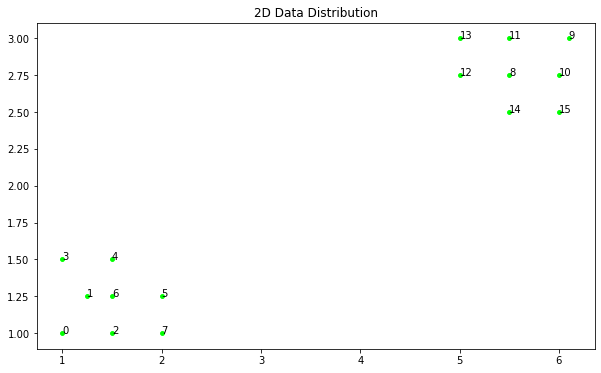

Negative LOF Matrix: from k = 4 to k = 15
      4     5     6     7    8     9     10    11    12    13    14    15
0  -1.00 -0.97 -0.94 -0.97 -1.0 -1.02 -1.02 -1.03 -1.03 -1.02 -1.01 -0.99
1  -1.09 -1.05 -1.01 -1.02 -1.0 -1.00 -1.00 -1.00 -1.00 -0.99 -0.99 -1.00
2  -0.97 -1.00 -1.05 -1.03 -1.0 -1.00 -1.00 -0.99 -0.99 -1.00 -1.00 -1.00
3  -1.00 -0.99 -0.98 -0.96 -1.0 -1.01 -1.01 -1.01 -1.01 -1.01 -0.99 -0.99
4  -0.97 -0.96 -1.02 -1.03 -1.0 -0.99 -0.99 -0.99 -0.99 -1.00 -1.00 -1.00
5  -1.16 -1.07 -0.94 -0.97 -1.0 -0.99 -1.00 -1.00 -1.00 -1.01 -1.01 -1.01
6  -0.93 -0.96 -1.06 -1.06 -1.0 -1.00 -0.99 -0.99 -0.99 -1.00 -1.00 -1.00
7  -1.16 -1.11 -0.96 -0.96 -1.0 -0.99 -0.99 -0.99 -1.00 -1.00 -1.00 -1.01
8  -0.98 -1.05 -1.06 -1.05 -1.0 -1.00 -0.99 -0.99 -0.99 -1.00 -1.00 -1.00
9  -1.03 -0.97 -0.99 -0.97 -1.0 -1.02 -1.03 -1.03 -1.04 -1.01 -1.01 -0.99
10 -0.98 -0.92 -0.96 -0.99 -1.0 -1.02 -1.02 -1.02 -1.02 -1.00 -0.99 -0.99
11 -1.03 -1.05 -1.06 -1.04 -1.0 -1.00 -1.00 -1.00 -0.99 -1.00 -1.00 -1

In [2]:
# Create a set of 2D datapoints consisting of two distant clusters of similar density
X1 = np.array([[1, 1], [1.25, 1.25], [1.5, 1], [1, 1.5], [1.5, 1.5], [2, 1.25], [1.5, 1.25], [2, 1],  
              [5.5, 2.75], [6.1, 3],
              [6, 2.75], [5.5, 3], [5, 2.75], [5, 3], [5.5, 2.5], [6, 2.5]])


# An array to store the ID of the data points (for using in the plot)
datapoints = np.arange(0, X1.shape[0])


# Plot the data points
plt.figure(figsize=(10, 6))
plt.title("2D Data Distribution")
plt.scatter(X1[:, 0], X1[:, 1], s=15, c='lime')

# show the point IDs on the plot
for i in range(len(datapoints)):
    plt.text(X1[i, 0], X1[i, 1], str(int(datapoints[i])))
plt.show()


# Set a range of values for k
k_list = np.arange(4, 16)


'''
Declare a matrix to store negative LOF values for each data point over a range of k.
- Rows: no. of data points
- Columns: no. of k's in the range

We initialise this matrix with unusually large values.

'''
negative_lof_matrix = np.ones((X1.shape[0], len(k_list))) * 99999


# For each k, generete ngative LOF and store in the above matrix
for i in range(len(k_list)):
    lof = LocalOutlierFactor(n_neighbors=k_list[i], algorithm='auto', contamination='auto', n_jobs=-1)  
    lof.fit(X1)
    
    # store the negative LOF values in the matrix
    for j in range(len(lof.negative_outlier_factor_)):
        negative_lof_matrix[j, i] = lof.negative_outlier_factor_[j]


# Show the negative LOF matrix
print("Negative LOF Matrix: from k = %d to k = %d" % (k_list[0], k_list[len(k_list)-1]))

column_names = [_ for _ in k_list]
row_names = [_ for _ in datapoints]
df = pd.DataFrame(np.around(negative_lof_matrix,2), index=row_names, columns=column_names)
print(df)

## Task 1: Observation

We see from the **negative LOF matrix** that the negative LOF values over the range of $k$ are **similar across all data points**.

It indicates that there are **no outliers** in the dataset.

## Task 2: Analyze the Effect of Various $k$ on a Single Cluster and Few Distant Points


There are total 11 data points. 
- The single cluster has 8 points. 
- There are three distant points.

The three distant points are considered outliers. Thus, their negative LOF values should be **much smaller** than that of the data points in the single cluster.

- However, whether the three points will be detected as outliers (having small negative LOF values) depends on the choice of $k$. 

Thus, we vary $k$ within a wide range (1 to 10), and see **how the LOF chages** for the data points.

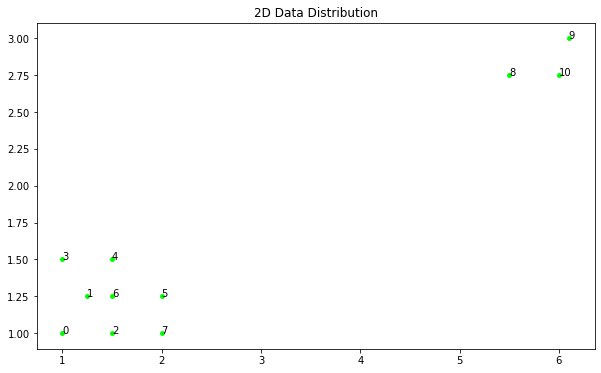

Negative LOF Matrix: from k = 1 to k = 11
      1     2     3     4     5     6     7     8     9     10    11
0  -1.41 -1.28 -1.10 -1.00 -0.96 -0.94 -0.97 -0.99 -0.99 -0.99 -0.99
1  -1.00 -0.97 -0.99 -1.09 -1.05 -1.01 -1.02 -0.99 -0.99 -1.00 -1.00
2  -1.00 -0.83 -0.84 -0.97 -0.99 -1.06 -1.03 -1.00 -1.00 -1.00 -1.00
3  -1.41 -1.07 -1.10 -1.00 -0.99 -0.98 -0.96 -0.99 -0.99 -0.99 -0.99
4  -1.00 -0.83 -0.90 -0.97 -0.95 -1.02 -1.03 -1.00 -1.00 -1.00 -1.00
5  -1.00 -1.21 -1.22 -1.16 -1.07 -0.95 -0.97 -1.01 -1.01 -1.01 -1.01
6  -1.00 -1.06 -1.18 -0.93 -0.96 -1.06 -1.06 -1.00 -1.00 -1.00 -1.00
7  -1.00 -1.33 -1.22 -1.16 -1.10 -0.96 -0.96 -1.01 -1.01 -1.01 -1.01
8  -1.86 -0.94 -3.25 -4.06 -4.50 -3.90 -3.75 -0.99 -1.00 -1.00 -1.00
9  -1.00 -0.94 -3.25 -4.23 -4.79 -4.21 -4.08 -1.09 -1.02 -0.99 -0.99
10 -1.00 -1.13 -3.25 -4.18 -4.70 -4.12 -3.99 -1.06 -0.99 -0.99 -0.99


In [3]:
# Create a set of 2D datapoints consisting of a cluster and a few distant data points
X2 = np.array([[1, 1], [1.25, 1.25], [1.5, 1], [1, 1.5], [1.5, 1.5], [2, 1.25], [1.5, 1.25], [2, 1],           
              [5.5, 2.75], [6.1, 3], [6, 2.75]])

            
# An array to store the ID of the data points (for using in the plot)
datapoints = np.arange(0, X2.shape[0])


# Plot the data points
plt.figure(figsize=(10, 6))
plt.title("2D Data Distribution")
plt.scatter(X2[:, 0], X2[:, 1], c="lime", s=15)

# show the point IDs on the plot
for i in range(len(datapoints)):
    plt.text(X2[i, 0], X2[i, 1], str(int(datapoints[i])))
plt.show()


# Set a range of values for k
k_list = np.arange(1, 12)


'''
Declare a matrix to store negative LOF values for each data point over a range of k.
- Rows: no. of data points
- Columns: no. of k's in the range

We initialise this matrix with unusually large values.

'''
negative_lof_matrix = np.ones((X2.shape[0], len(k_list))) * 99999


# For each k, generete ngative LOF and store in the above matrix
for i in range(len(k_list)):
    lof = LocalOutlierFactor(n_neighbors=k_list[i], algorithm='auto', contamination='auto', n_jobs=-1)  
    lof.fit(X2)
    
    # store the negative LOF values in the matrix
    for j in range(len(lof.negative_outlier_factor_)):
        negative_lof_matrix[j, i] = lof.negative_outlier_factor_[j]


# Show the negative LOF matrix
print("Negative LOF Matrix: from k = %d to k = %d" % (k_list[0], k_list[len(k_list)-1]))
column_names = [_ for _ in k_list]
row_names = [_ for _ in datapoints]
df = pd.DataFrame(np.around(negative_lof_matrix,2), index=row_names, columns=column_names)
print(df)

## Task 2: Observation

We see that:
- For $k = 1$ and $k = 2$: all data points have similar LOF values.
- For $k = 8 \sim 11$: all data points have similar LOF values.

The three distant points (8, 9, and 10) have much smaller negative LOF values only when $k$ is between 3 to 7.

        Thus, LOF algorithm can detect the three outliers for a specific range of k values.
        
- Setting $k$ below a minimum value or over a maximum value will be ineffective for LOF to detect the outliers.

According to the heuristic for selecting the range for $k$, discussed earlier, the minimum and maximum value of $k$ should be set as follows:

- Minimum $k$: It should be equal to the minimal cluster size which consists of similar behaving points. 

        For the dataset with a single cluster and a three distant points, the minimum number of data points we require to form a cluster should be more than three. If we set k = 3 (a data point needs three neighbors), then none of the three distant points will have more than two neighbors. Hence, they will be coonsidered as outliers. A value of k < 3 will not reveal any outliers. 
        
       
        
- Maximum $k$: It should be equal to the maximum number of objects that we want to be considered outliers if clustered together. 

        For the dataset with a single cluster and a three distant points, this maximum number of data points should be 7. Note that if we set this value to 8, then the outlier cluster and the normal cluster would have equal number of points. We should require the outlier cluster cardinality to be smaller than the normal cluster cardinality. If we set k > 7, then LOF for all data points become similar and we won't be able to detect the outliers.
        
        
In the next two tasks we investogate what happens if we set:
- $k$ smaller than its minimum value (Task 3)
- $k$ larger than its maximum value (Task 4)

## Task 3: Effect of a Small $k$ on a Single Cluster and Few Distant Points

We set $k$ with a value smaller than the minimum $k$. i.e., $k < 3$.

## Outliers



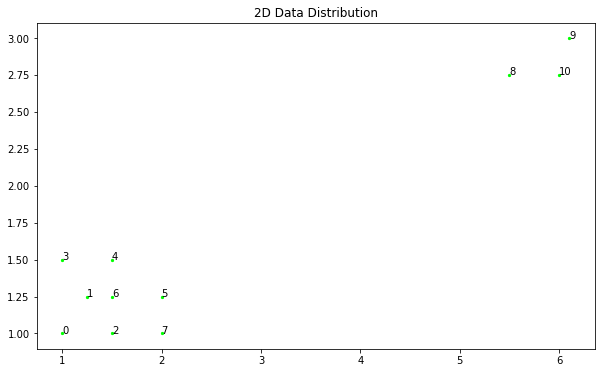

Negative LOF Matrix: from k = 2 to k = 2
       2
0  -1.28
1  -0.97
2  -0.83
3  -1.07
4  -0.83
5  -1.21
6  -1.06
7  -1.33
8  -0.94
9  -0.94
10 -1.13


In [4]:
# Create a set of 2D datapoints consisting of a cluster and a few distant data points
X2 = np.array([[1, 1], [1.25, 1.25], [1.5, 1], [1, 1.5], [1.5, 1.5], [2, 1.25], [1.5, 1.25], [2, 1],           
              [5.5, 2.75], [6.1, 3], [6, 2.75]])


# An array to store the ID of the data points (for using in the plot)
datapoints = np.arange(0, X2.shape[0])


# Plot the data points
plt.figure(figsize=(10, 6))
plt.title("2D Data Distribution")
plt.scatter(X2[:, 0], X2[:, 1], c='lime', s=5)

# show the point IDs on the plot
for i in range(len(datapoints)):
    plt.text(X2[i, 0], X2[i, 1], str(int(datapoints[i])))
plt.show()


# Set a range of values for k
k_list = np.arange(2, 3)


'''
Declare a matrix to store negative LOF values for each data point over a range of k.
- Rows: no. of data points
- Columns: no. of k's in the range

We initialise this matrix with unusually large values.

'''
negative_lof_matrix = np.ones((X2.shape[0], len(k_list))) * 99999


# For each k, generete ngative LOF and store in the above matrix
for i in range(len(k_list)):
    lof = LocalOutlierFactor(n_neighbors=k_list[i], algorithm='auto', contamination='auto', n_jobs=-1)  
    lof.fit(X2)
    
    # store the negative LOF values in the matrix
    for j in range(len(lof.negative_outlier_factor_)):
        negative_lof_matrix[j, i] = lof.negative_outlier_factor_[j]


# Show the negative LOF matrix
print("Negative LOF Matrix: from k = %d to k = %d" % (k_list[0], k_list[len(k_list)-1]))
column_names = [_ for _ in k_list]
row_names = [_ for _ in datapoints]
df = pd.DataFrame(np.around(negative_lof_matrix,2), index=row_names, columns=column_names)
print(df)

## Task 3: Observation

We see that the negative LOF values are similar for all data points.

It indicates that there are **no outliers** in the dataset.

## Task 4: Effect of a Large $k$ on a Single Cluster and Few Distant Points

We set $k$ with a value larger than the maximum $k$. i.e., $k > 7$.

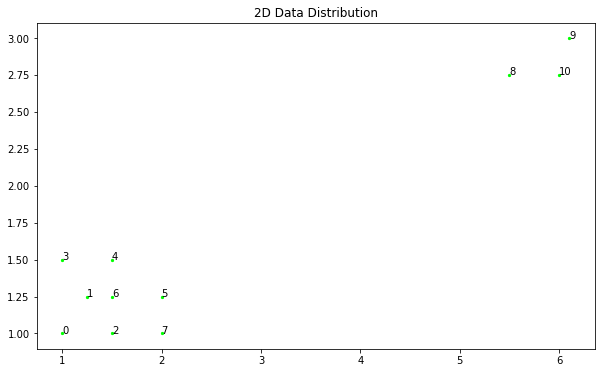

Negative LOF Matrix: from k = 8 to k = 8
       8
0  -0.99
1  -0.99
2  -1.00
3  -0.99
4  -1.00
5  -1.01
6  -1.00
7  -1.01
8  -0.99
9  -1.09
10 -1.06


In [5]:
# Create a set of 2D datapoints consisting of a cluster and a few distant data points
X2 = np.array([[1, 1], [1.25, 1.25], [1.5, 1], [1, 1.5], [1.5, 1.5], [2, 1.25], [1.5, 1.25], [2, 1],           
              [5.5, 2.75], [6.1, 3], [6, 2.75]])


# An array to store the ID of the data points (for using in the plot)
datapoints = np.arange(0, X2.shape[0])


# Plot the data points
plt.figure(figsize=(10, 6))
plt.title("2D Data Distribution")
plt.scatter(X2[:, 0], X2[:, 1], c='lime', s=5)

# show the point IDs on the plot
for i in range(len(datapoints)):
    plt.text(X2[i, 0], X2[i, 1], str(int(datapoints[i])))
plt.show()


# Set a range of values for k
k_list = np.arange(8, 9)


'''
Declare a matrix to store negative LOF values for each data point over a range of k.
- Rows: no. of data points
- Columns: no. of k's in the range

We initialise this matrix with unusually large values.

'''
negative_lof_matrix = np.ones((X2.shape[0], len(k_list))) * 99999


# For each k, generete ngative LOF and store in the above matrix
for i in range(len(k_list)):
    lof = LocalOutlierFactor(n_neighbors=k_list[i], algorithm='auto', contamination='auto', n_jobs=-1)  
    lof.fit(X2)
    
    # store the negative LOF values in the matrix
    for j in range(len(lof.negative_outlier_factor_)):
        negative_lof_matrix[j, i] = lof.negative_outlier_factor_[j]


# Show the negative LOF matrix
print("Negative LOF Matrix: from k = %d to k = %d" % (k_list[0], k_list[len(k_list)-1]))
column_names = [_ for _ in k_list]
row_names = [_ for _ in datapoints]
df = pd.DataFrame(np.around(negative_lof_matrix,2), index=row_names, columns=column_names)
print(df)

## Task 4: Observation

We see that the negative LOF values are similar for all data points.

It indicates that there are **no outliers** in the dataset.

## Task 5: Use an Optimal Range for $k$ for a Single Cluster and Few Distant Points

Based on the observations from Task 3 and 4, we conclude that the effective range for $k$ should be:

- Minimum $k = 3$ 
- Maximum $k = 7$ 


Then, for each data point
- Compute negative LOF values for each $k$ in the above range. 
- Take minimum of the negative LOF values.

Sort the negative LOF values for all data points.

Get the top three data points (three smallest negative LOF data points).

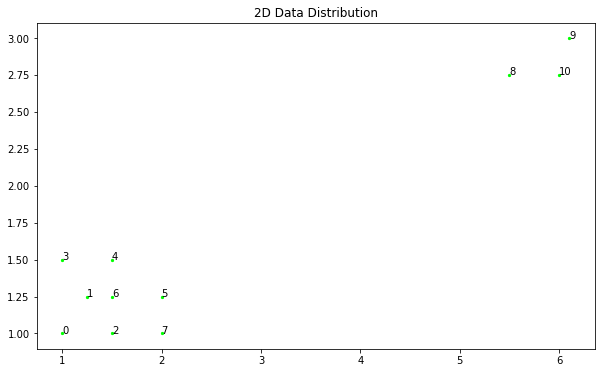

Negative LOF Matrix: from k = 3 to k = 7
       3     4     5     6     7
0  -1.10 -1.00 -0.96 -0.94 -0.97
1  -0.99 -1.09 -1.05 -1.01 -1.02
2  -0.84 -0.97 -0.99 -1.06 -1.03
3  -1.10 -1.00 -0.99 -0.98 -0.96
4  -0.90 -0.97 -0.95 -1.02 -1.03
5  -1.22 -1.16 -1.07 -0.95 -0.97
6  -1.18 -0.93 -0.96 -1.06 -1.06
7  -1.22 -1.16 -1.10 -0.96 -0.96
8  -3.25 -4.06 -4.50 -3.90 -3.75
9  -3.25 -4.23 -4.79 -4.21 -4.08
10 -3.25 -4.18 -4.70 -4.12 -3.99


Outlier Rank:  1 | Data  9 (Negative LOF = -4.785246)
Outlier Rank:  2 | Data 10 (Negative LOF = -4.701514)
Outlier Rank:  3 | Data  8 (Negative LOF = -4.500285)


In [6]:
# Create a set of 2D datapoints consisting of a cluster and a few distant data points
X2 = np.array([[1, 1], [1.25, 1.25], [1.5, 1], [1, 1.5], [1.5, 1.5], [2, 1.25], [1.5, 1.25], [2, 1],           
              [5.5, 2.75], [6.1, 3], [6, 2.75]])


# An array to store the ID of the data points (for using in the plot)
datapoints = np.arange(0, X2.shape[0])


# Plot the data points
plt.figure(figsize=(10, 6))
plt.title("2D Data Distribution")
plt.scatter(X2[:, 0], X2[:, 1], c='lime', s=5)

# show the point IDs on the plot
for i in range(len(datapoints)):
    plt.text(X2[i, 0], X2[i, 1], str(int(datapoints[i])))
plt.show()


# Set a range of values for k
k_list = np.arange(3, 8)


'''
Declare a matrix to store negative LOF values for each data point over a range of k.
- Rows: no. of data points
- Columns: no. of k's in the range

We initialise this matrix with unusually large values.

'''
negative_lof_matrix = np.ones((X2.shape[0], len(k_list))) * 99999


# For each k, generete ngative LOF and store in the above matrix
for i in range(len(k_list)):
    lof = LocalOutlierFactor(n_neighbors=k_list[i], algorithm='auto', contamination='auto', n_jobs=-1)  
    lof.fit(X2)
    
    # store the negative LOF values in the matrix
    for j in range(len(lof.negative_outlier_factor_)):
        negative_lof_matrix[j, i] = lof.negative_outlier_factor_[j]


# Show the negative LOF matrix
print("Negative LOF Matrix: from k = %d to k = %d" % (k_list[0], k_list[len(k_list)-1]))
column_names = [_ for _ in k_list]
row_names = [_ for _ in datapoints]
df = pd.DataFrame(np.around(negative_lof_matrix,2), index=row_names, columns=column_names)
print(df)




# An array to store the minimum negative LOF for each data point (initialized with large values)
negative_lof_array = np.ones((X2.shape[0]))*99999


# Get the minimum LOF for each data point and store in the above array
for i in range(len(negative_lof_array)):
    negative_lof_array[i] = np.min(negative_lof_matrix[i, :])
    

'''
We will sort the above array. Outliers (large negative LOF) will be on top of the array.

After sorting, we need to get the indices of data points for the corresponding negative LOF values.

To get the indices after sorting, we create a dictionary object with indices as the keys and negative LOF as values.
'''
    
# Create a dictionary of the negative LOF values
negative_lof_array_dict = {}

# For each negative LOF value, add an index starting from 0 to correspond to the actual data indices
for i in range(len(negative_lof_array)):
    negative_lof_array_dict[i] = negative_lof_array[i]
    

# Sort the negative LOF values in their increasing order
sorted_negative_lof_array_dict = {k: v for k, v in sorted(negative_lof_array_dict.items(), key=lambda item: item[1])}


# Get the indices of the data points for the sorted negative LOF values 
sorted_negative_lof_array_dict_keys =  sorted_negative_lof_array_dict.keys()


# Show some top negative LOF data poits using the indices of the dictionary
print("\n")
for i in range (3):
    key = list(sorted_negative_lof_array_dict_keys)[i]

    print("Outlier Rank: %2d | Data %2d (Negative LOF = %f)" 
                  % (i+1, key, sorted_negative_lof_array_dict.get(key)))
    

## Task 5: Observation

We see that after using an effective range for $k$, LOF is able to **detect the three outliers**.